In [9]:
# necessary import for every use of TASMANIAN
import TasmanianSG
import numpy as np

# imports specifically needed by the examples
import math
from random import uniform
from datetime import datetime

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
print("TasmanianSG version: {0:s}".format(TasmanianSG.__version__))
print("TasmanianSG license: {0:s}".format(TasmanianSG.__license__))

grid  = TasmanianSG.TasmanianSparseGrid()
grid1 = TasmanianSG.TasmanianSparseGrid()
grid2 = TasmanianSG.TasmanianSparseGrid() 

TasmanianSG version: 4.0
TasmanianSG license: BSD 3-Clause


In [ ]:
#############################################################################

# EXAMPLE 1 for OSM:
# interpolate: f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)
# using piecewise linear basis functions.

# 1000 2-dimensional sample points 
aPnts = np.empty([1000, 2])  
for iI in range(1000):
    for iJ in range(2):
        aPnts[iI][iJ] = uniform(-1.0, 1.0)

# Result
aTres = np.empty([1000,])
for iI in range(1000):
    aTres[iI] = math.cos(0.5 * math.pi * aPnts[iI][0]) * math.cos(0.5 * math.pi * aPnts[iI][1])

# Sparse Grid with dimension 2 and 1 output and refinement level 5
iDim = 2
iOut = 1
iDepth = 5
which_basis = 1 #1= linear basis functions -> Check the manual for other options

print("\n-------------------------------------------------------------------------------------------------")
print("Example 1 for OSM: interpolate f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)")
print("       using fixed sparse grid with depth {0:1d}".format(iDepth))
print("       the error is estimated as the maximum from 1000 random points\n")

# construct sparse grid
grid.makeLocalPolynomialGrid(iDim, iOut, iDepth, which_basis, "localp")
aPoints = grid.getPoints()
iNumP1 = aPoints.shape[0]
aVals = np.empty([aPoints.shape[0], 1])
for iI in range(aPoints.shape[0]):
    aVals[iI] = math.cos(0.5 * math.pi * aPoints[iI][0]) * math.cos(0.5 * math.pi * aPoints[iI][1])
grid.loadNeededPoints(aVals)

# compute the error
aRes = grid.evaluateBatch(aPnts)
fError1 = max(np.fabs(aRes[:,0] - aTres))
print(" For localp    Number of points: {0:1d}   Max. Error: {1:1.16e}".format(iNumP1, fError1))

# write coordinates of grid to a text file
f=open("fix_sparse_grid.txt", 'a')
np.savetxt(f, aPoints, fmt='% 2.16f')
f.close()

In [ ]:
#############################################################################

## EXAMPLE 2 for OSM:
## interpolate: f(x,y) = exp(-x) / (1 + 100 * exp(-10 * y))
## using refinement

aTres = np.empty([1000,])
for iI in range(1000):
    aTres[iI] = math.cos(0.5 * math.pi * aPnts[iI][0]) * math.cos(0.5 * math.pi * aPnts[iI][1])

# Adaptive Sparse Grid with dimension 2 and 1 output and maximum refinement level 5, refinement criterion.
iDim = 2
iOut = 1
iDepth = 1
fTol = 1.E-5
which_basis = 1 
refinement_level = 5

# level of grid before refinement
grid1.makeLocalPolynomialGrid(iDim, iOut, iDepth, which_basis, "localp")

aPoints = grid1.getPoints()
aVals = np.empty([aPoints.shape[0], 1])
for iI in range(aPoints.shape[0]):
    aVals[iI] = math.cos(0.5 * math.pi * aPoints[iI][0]) * math.cos(0.5 * math.pi * aPoints[iI][1])
grid1.loadNeededPoints(aVals)

print("\n-------------------------------------------------------------------------------------------------")
print("Example 2: interpolate f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)")
print("   the error is estimated as the maximum from 1000 random points")
print("   tolerance is set at 1.E-5 and piecewise linear basis functions are used\n")

print("               Classic refinement ")
print(" refinement level         points     error   ")

#refinement level
for iK in range(refinement_level):
    grid1.setSurplusRefinement(fTol, 1, "fds")   #also use fds, or other rules
    aPoints = grid1.getNeededPoints()
    aVals = np.empty([aPoints.shape[0], 1])
    for iI in range(aPoints.shape[0]):
        aVals[iI] = math.cos(0.5 * math.pi * aPoints[iI][0]) * math.cos(0.5 * math.pi * aPoints[iI][1])
    grid1.loadNeededPoints(aVals)

    aRes = grid1.evaluateBatch(aPnts)
    fError1 = max(np.fabs(aRes[:,0] - aTres))

    print(" {0:9d} {1:9d}  {2:1.2e}".format(iK+1, grid1.getNumPoints(), fError1))

# write coordinates of grid to a text file
f2=open("Adaptive_sparse_grid.txt", 'a')
np.savetxt(f2, aPoints, fmt='% 2.16f')
f2.close()
 
grid2 = TasmanianSG.TasmanianSparseGrid()
grid2.makeLocalPolynomialGrid(iDim, iOut, refinement_level+iDepth, which_basis, "localp")
a = grid2.getNumPoints()
 
print("\n-------------------------------------------------------------------------------------------------")
print "   a fix sparse grid of level ", refinement_level+iDepth, " would consist of " ,a, " points"
print("\n-------------------------------------------------------------------------------------------------\n")   

**EXERCISES**

In [3]:
#############################################################################

# EXERCISE 1 -- OSCILLATORY
def fun(x,y):
    w = 0.5
    c_1 = 4.5
    c_2 = 5.7
    func_val = math.cos( 2*math.pi*w + c_1*x + c_2*y )
    
    return func_val    

In [16]:
# 1000 2-dimensional sample points 
aPnts = np.empty([1000, 2])  
for iI in range(1000):
    for iJ in range(2):
        aPnts[iI][iJ] = uniform(-1.0, 1.0)

# Result
aTres = np.empty([1000,])
for iI in range(1000):
    aTres[iI] = fun(aPnts[iI][0], aPnts[iI][1])

# Sparse Grid with dimension 2 and 1 output and refinement level 5
iDim = 2
iOut = 1
iDepth = 7
which_basis = 1 #1= linear basis functions -> Check the manual for other options

print("\n-------------------------------------------------------------------------------------------------")
print("Example 1 for OSM: interpolate f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)")
print("       using fixed sparse grid with depth {0:1d}".format(iDepth))
print("       the error is estimated as the maximum from 1000 random points\n")

# construct sparse grid
grid.makeLocalPolynomialGrid(iDim, iOut, iDepth, which_basis, "localp")
aPoints = grid.getPoints()
iNumP1 = aPoints.shape[0]
aVals = np.empty([aPoints.shape[0], 1])
for iI in range(aPoints.shape[0]):
    aVals[iI] = fun(aPnts[iI][0], aPnts[iI][1])
grid.loadNeededPoints(aVals)

# compute the error
aRes = grid.evaluateBatch(aPnts)
fError1 = max(np.fabs(aRes[:,0] - aTres))
print(" For localp    Number of points: {0:1d}   Max. Error: {1:1.16e}".format(iNumP1, fError1))

# write coordinates of grid to a text file
f=open("fix_sparse_grid.txt", 'a')
np.savetxt(f, aPoints, fmt='% 2.16f')
f.close()


-------------------------------------------------------------------------------------------------
Example 1 for OSM: interpolate f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)
       using fixed sparse grid with depth 7
       the error is estimated as the maximum from 1000 random points

 For localp    Number of points: 705   Max. Error: 3.8774512353626420e+00


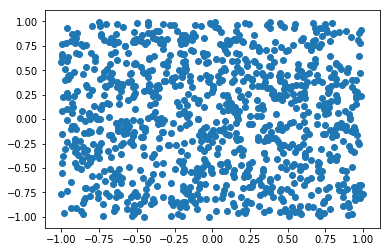

In [17]:
# 2D plot - random grid
plt.scatter(aPnts[:,0],aPnts[:,1])
plt.show()

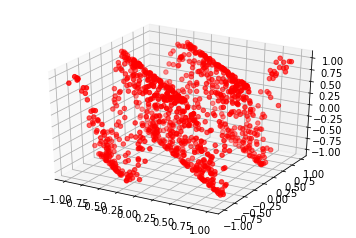

In [23]:
# 3D plot - random grid
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(aPnts[:,0],aPnts[:,1], aTres[:], c='r', marker='o')

plt.show()

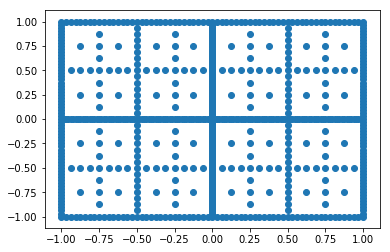

In [19]:
# 2D plot - sparse grid
from matplotlib import pyplot as plt
plt.scatter(aPoints[:,0],aPoints[:,1])
plt.show()

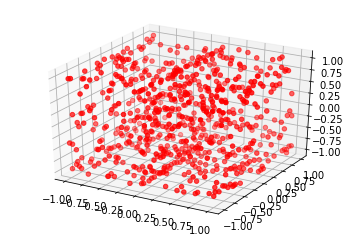

In [20]:
# 3D plot - sparse grid
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(aPoints[:,0],aPoints[:,1], aVals[:], c='r', marker='o')

plt.show()

In [25]:
#############################################################################

# EXERCISE 1 -- PRODUCT PEAK
def fun2(x,y):
    w = 0.5
    c_1 = 4.5
    c_2 = 5.7
    func_val = ((c_1**(-2) + (x - w)**2)*(-1)) * ((c_2**(-2) + (y - w)**2)*(-1))  
    
    return func_val

In [26]:
# 1000 2-dimensional sample points 
aPnts = np.empty([1000, 2])  
for iI in range(1000):
    for iJ in range(2):
        aPnts[iI][iJ] = uniform(-1.0, 1.0)

# Result
aTres = np.empty([1000,])
for iI in range(1000):
    aTres[iI] = fun2(aPnts[iI][0], aPnts[iI][1])

# Sparse Grid with dimension 2 and 1 output and refinement level 5
iDim = 2
iOut = 1
iDepth = 7
which_basis = 1 #1= linear basis functions -> Check the manual for other options

print("\n-------------------------------------------------------------------------------------------------")
print("Example 1 for OSM: interpolate f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)")
print("       using fixed sparse grid with depth {0:1d}".format(iDepth))
print("       the error is estimated as the maximum from 1000 random points\n")

# construct sparse grid
grid.makeLocalPolynomialGrid(iDim, iOut, iDepth, which_basis, "localp")
aPoints = grid.getPoints()
iNumP1 = aPoints.shape[0]
aVals = np.empty([aPoints.shape[0], 1])
for iI in range(aPoints.shape[0]):
    aVals[iI] = fun2(aPnts[iI][0], aPnts[iI][1])
grid.loadNeededPoints(aVals)

# compute the error
aRes = grid.evaluateBatch(aPnts)
fError1 = max(np.fabs(aRes[:,0] - aTres))
print(" For localp    Number of points: {0:1d}   Max. Error: {1:1.16e}".format(iNumP1, fError1))

# write coordinates of grid to a text file
f=open("fix_sparse_grid.txt", 'a')
np.savetxt(f, aPoints, fmt='% 2.16f')
f.close()


-------------------------------------------------------------------------------------------------
Example 1 for OSM: interpolate f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)
       using fixed sparse grid with depth 7
       the error is estimated as the maximum from 1000 random points

 For localp    Number of points: 705   Max. Error: 4.7200686230545790e+00


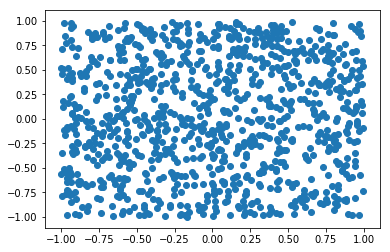

In [27]:
# 2D plot - random grid
from matplotlib import pyplot as plt
plt.scatter(aPnts[:,0],aPnts[:,1])
plt.show()

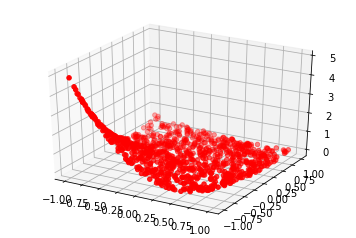

In [28]:
# 3D plot - random grid
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(aPnts[:,0],aPnts[:,1], aTres[:], c='r', marker='o')

plt.show()

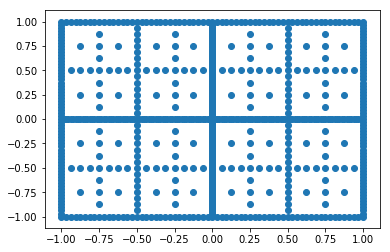

In [29]:
# 2D plot - sparse grid
from matplotlib import pyplot as plt
plt.scatter(aPoints[:,0],aPoints[:,1])
plt.show()

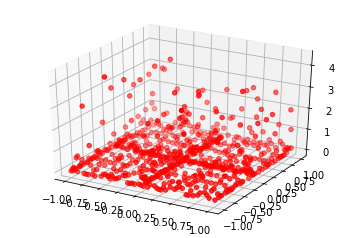

In [30]:
# 3D plot - sparse grid
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(aPoints[:,0],aPoints[:,1], aVals[:], c='r', marker='o')

plt.show()

In [10]:
#############################################################################

# EXERCISE 1 -- CORNER PEAK
def fun3(x,y):
    w = 0.5
    c_1 = 0.5
    c_2 = 0.7
    func_val = (1+c_1*x+c_2*y)**(-(2+1)) 
    
    return func_val

In [15]:
# 1000 2-dimensional sample points 
aPnts = np.empty([1000, 2])  
for iI in range(1000):
    for iJ in range(2):
        aPnts[iI][iJ] = uniform(-1.0, 1.0)

# Result
aTres = np.empty([1000,])
for iI in range(1000):
    aTres[iI] = fun3(aPnts[iI][0], aPnts[iI][1])

# Sparse Grid with dimension 2 and 1 output and refinement level 5
iDim = 2
iOut = 1
iDepth = 7
which_basis = 1 #1= linear basis functions -> Check the manual for other options

print("\n-------------------------------------------------------------------------------------------------")
print("Example 1 for OSM: interpolate f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)")
print("       using fixed sparse grid with depth {0:1d}".format(iDepth))
print("       the error is estimated as the maximum from 1000 random points\n")

# construct sparse grid
grid.makeLocalPolynomialGrid(iDim, iOut, iDepth, which_basis, "localp")
aPoints = grid.getPoints()
iNumP1 = aPoints.shape[0]
aVals = np.empty([aPoints.shape[0], 1])
for iI in range(aPoints.shape[0]):
    aVals[iI] = fun3(aPoints[iI][0], aPoints[iI][1])
grid.loadNeededPoints(aVals)

# compute the error
aRes = grid.evaluateBatch(aPnts)
fError1 = max(np.fabs(aRes[:,0] - aTres))
print(" For localp    Number of points: {0:1d}   Max. Error: {1:1.16e}".format(iNumP1, fError1))

# write coordinates of grid to a text file
f=open("fix_sparse_grid.txt", 'a')
np.savetxt(f, aPoints, fmt='% 2.16f')
f.close()


-------------------------------------------------------------------------------------------------
Example 1 for OSM: interpolate f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)
       using fixed sparse grid with depth 7
       the error is estimated as the maximum from 1000 random points

 For localp    Number of points: 705   Max. Error: 5.3722366511954391e+08


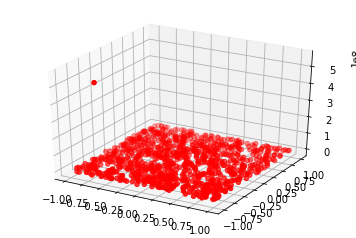

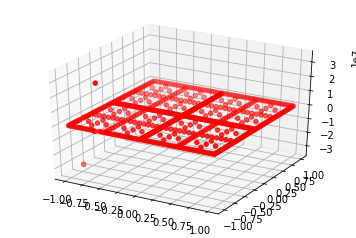

In [16]:
# 3D plot - random grid
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(aPnts[:,0],aPnts[:,1], aTres[:], c='r', marker='o')

plt.show()

# 3D plot - sparse grid
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(aPoints[:,0],aPoints[:,1], aVals[:], c='r', marker='o')

plt.show()

In [18]:
#############################################################################

## ADAPTIVE GRID

aTres = np.empty([1000,])
for iI in range(1000):
    aTres[iI] = fun3(aPnts[iI][0], aPnts[iI][1])

# Adaptive Sparse Grid with dimension 2 and 1 output and maximum refinement level 5, refinement criterion.
iDim = 2
iOut = 1
iDepth = 1
fTol = 1.E-5
which_basis = 1 
refinement_level = 7

# level of grid before refinement
grid1.makeLocalPolynomialGrid(iDim, iOut, iDepth, which_basis, "localp")

aPoints = grid1.getPoints()
aVals = np.empty([aPoints.shape[0], 1])
for iI in range(aPoints.shape[0]):
    aVals[iI] = fun3(aPoints[iI][0], aPoints[iI][1])
grid1.loadNeededPoints(aVals)

print("\n-------------------------------------------------------------------------------------------------")
print("Example 2: interpolate f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)")
print("   the error is estimated as the maximum from 1000 random points")
print("   tolerance is set at 1.E-5 and piecewise linear basis functions are used\n")

print("               Classic refinement ")
print(" refinement level         points     error   ")

#refinement level
for iK in range(refinement_level):
    grid1.setSurplusRefinement(fTol, 1, "fds")   #also use fds, or other rules
    aPoints = grid1.getNeededPoints()
    aVals = np.empty([aPoints.shape[0], 1])
    for iI in range(aPoints.shape[0]):
        aVals[iI] = fun3(aPoints[iI][0], aPoints[iI][1])
    grid1.loadNeededPoints(aVals)

    aRes = grid1.evaluateBatch(aPnts)
    fError1 = max(np.fabs(aRes[:,0] - aTres))

    print(" {0:9d} {1:9d}  {2:1.2e}".format(iK+1, grid1.getNumPoints(), fError1))

# write coordinates of grid to a text file
f2=open("Adaptive_sparse_grid.txt", 'a')
np.savetxt(f2, aPoints, fmt='% 2.16f')
f2.close()
 
grid2 = TasmanianSG.TasmanianSparseGrid()
grid2.makeLocalPolynomialGrid(iDim, iOut, refinement_level+iDepth, which_basis, "localp")
a = grid2.getNumPoints()
 
print("\n-------------------------------------------------------------------------------------------------")
print "   a fix sparse grid of level ", refinement_level+iDepth, " would consist of " ,a, " points"
print("\n-------------------------------------------------------------------------------------------------\n") 


-------------------------------------------------------------------------------------------------
Example 2: interpolate f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)
   the error is estimated as the maximum from 1000 random points
   tolerance is set at 1.E-5 and piecewise linear basis functions are used

               Classic refinement 
 refinement level         points     error   
         1        12  5.49e+08
         2        25  5.49e+08
         3        55  5.49e+08
         4       123  5.50e+08
         5       275  5.50e+08
         6       611  5.37e+08
         7      1347  5.57e+08

-------------------------------------------------------------------------------------------------
   a fix sparse grid of level  8  would consist of  1537  points

-------------------------------------------------------------------------------------------------



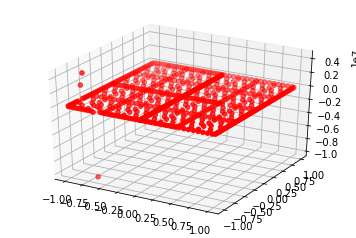

In [19]:
# 3D plot - adaptive sparse grid
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(aPoints[:,0],aPoints[:,1], aVals[:], c='r', marker='o')

plt.show()